In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)

In [2]:
DATA_DIR  = os.path.join(os.path.abspath("MachineLearningCVE/"))


In [3]:
X_train = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_features.pkl'))
X_test = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_features.pkl'))

y_train = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_labels.pkl'))
y_test = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_labels.pkl'))

In [4]:
label_dict = {'Benign': 0,
 'Botnet ARES': 1,
 'Brute Force': 2,
 'DoS/DDoS': 3,
 'Infiltration': 4,
 'PortScan': 5,
 'Web Attack': 6}

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511310 entries, 0 to 511309
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   destination_port         511310 non-null  float64
 1   fwd_packet_length_max    511310 non-null  float64
 2   bwd_packet_length_min    511310 non-null  float64
 3   bwd_packet_length_std    511310 non-null  float64
 4   flow_bytes_s             511310 non-null  float64
 5   flow_iat_mean            511310 non-null  float64
 6   flow_iat_std             511310 non-null  float64
 7   flow_iat_min             511310 non-null  float64
 8   fwd_iat_total            511310 non-null  float64
 9   fwd_iat_std              511310 non-null  float64
 10  fwd_iat_min              511310 non-null  float64
 11  bwd_iat_mean             511310 non-null  float64
 12  bwd_iat_std              511310 non-null  float64
 13  bwd_iat_max              511310 non-null  float64
 14  fwd_

In [6]:
y_train.value_counts()

label
0        238155
3        224188
5         40113
2          5986
6          1483
1          1360
4            25
dtype: int64

In [7]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = to_categorical(y_train, num_classes=7,dtype=np.int32)
y_test = to_categorical(y_test, num_classes=7,dtype=np.int32)

In [8]:
def get_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=(36,)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])
    return model

In [9]:
model = get_model()
history = model.fit(X_train,y_train,epochs=55,batch_size=64, validation_split=0.2, use_multiprocessing=True)

Epoch 1/55
6392/6392 [==============================] - 16s 2ms/step - loss: 0.1829 - accuracy: 0.9413 - val_loss: 0.0480 - val_accuracy: 0.9877
Epoch 2/55
6392/6392 [==============================] - 16s 2ms/step - loss: 0.0548 - accuracy: 0.9846 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 3/55
6392/6392 [==============================] - 16s 2ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0258 - val_accuracy: 0.9929
Epoch 4/55
6392/6392 [==============================] - 16s 2ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0194 - val_accuracy: 0.9946
Epoch 5/55
6392/6392 [==============================] - 16s 2ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0185 - val_accuracy: 0.9945
Epoch 6/55
6392/6392 [==============================] - 16s 2ms/step - loss: 0.0258 - accuracy: 0.9926 - val_loss: 0.0176 - val_accuracy: 0.9946
Epoch 7/55
6392/6392 [==============================] - 16s 2ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0159 - val_ac

In [10]:
model.evaluate(X_test,y_test)

6848/6848 [==============================] - 7s 1ms/step - loss: 0.0096 - accuracy: 0.9969


[0.009638120420277119, 0.9968557953834534]

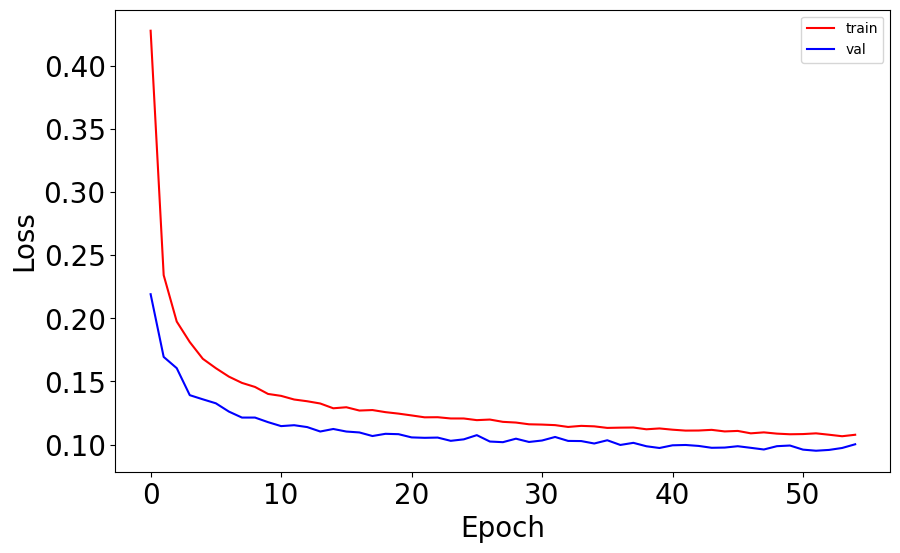

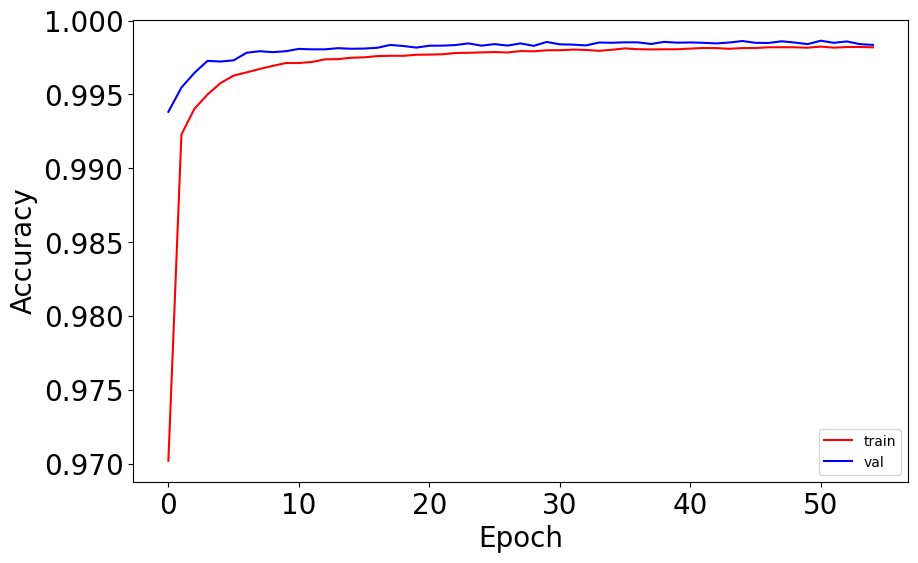

In [11]:
import matplotlib.pyplot as plt
def plot_history(lr_model_history):

    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
    ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=20)
    ax.set_ylabel(r'Loss', fontsize=20)
    ax.legend()
    ax.tick_params(labelsize=20)

    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='train')
    ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=20)
    ax.set_ylabel(r'Accuracy', fontsize=20)
    ax.legend()
    ax.tick_params(labelsize=20)
plot_history(history)

In [12]:
X_test = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_features.pkl'))
y_test = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_labels.pkl'))

In [13]:
predictions = model.predict(X_test)

6848/6848 [==============================] - 6s 911us/step


In [14]:
predictions = [np.argmax(x) for x in predictions]

In [15]:
y_test

,label
0,0
1,0
2,3
3,3
4,3
...,...
219129,5
219130,3
219131,0
219132,3


In [16]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predictions, target_names = ['Benign', 'Botnet ARES', 'Brute Force', 'DoS/DDoS', 'Infiltration', 'PortScan', 'Web Attack'], output_dict=True)

<Axes: >

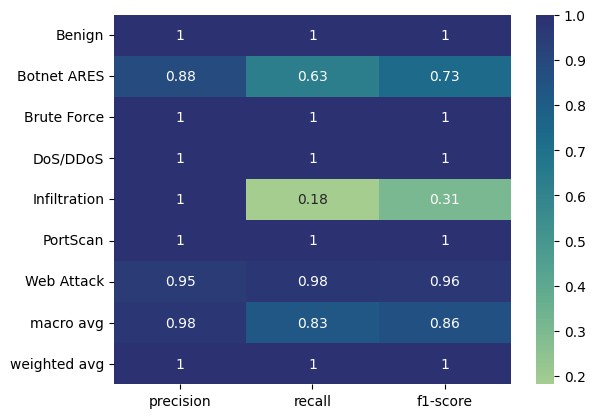

In [17]:
report.pop('accuracy')
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='crest')

In [18]:
X_test2 = X_test.copy(deep=True)

feature_acc = {}
y_test = to_categorical(y_test)
base = model.evaluate(X_test,y_test)[0]

for column in X_test2:
    X_test2[column] = np.zeros(len(X_test2[column]))
    feature_acc[column]= base - model.evaluate(X_test2,y_test)[0] 
    X_test2 = X_test.copy(deep=True)

6848/6848 [==============================] - 7s 1ms/step - loss: 0.0223 - accuracy: 0.9921


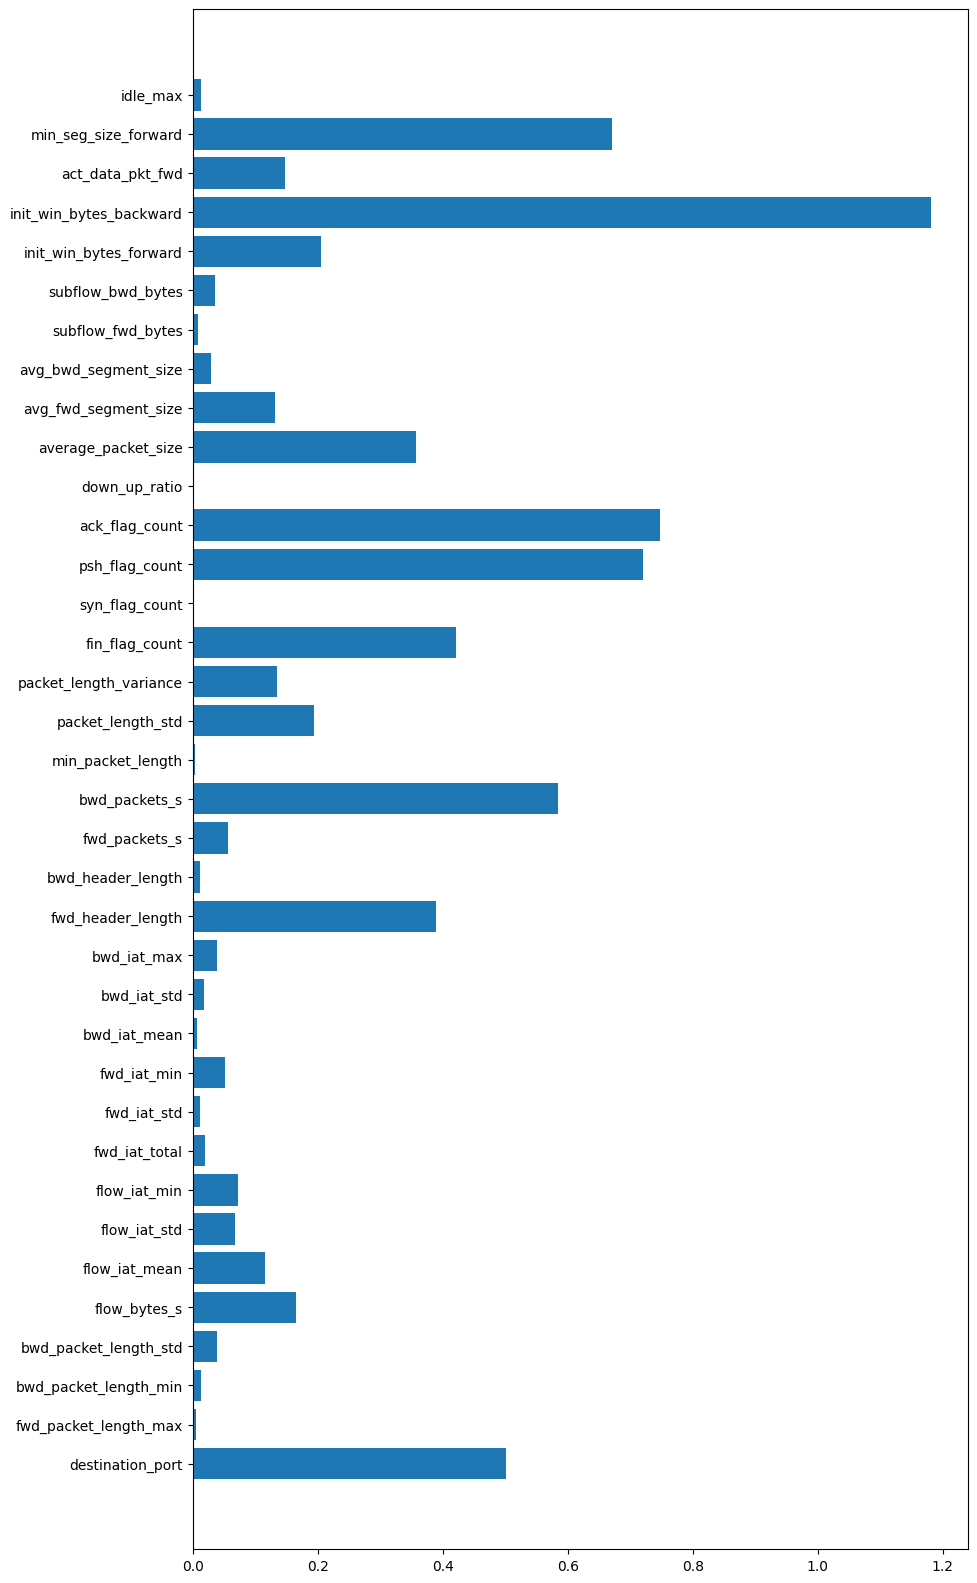

In [19]:
names = list(feature_acc.keys())
values = list(feature_acc.values())
values = [-x for x in values]
plt.figure(figsize=(10,20))
plt.barh(range(len(feature_acc)), values, tick_label=names)
plt.show()